In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Patch


In [13]:
categories_dict = {
    'NAIVE2': 'Naive/Simple',
    'SINGLE': 'Naive/Simple',
    'HOLT': 'Explicit Trend Models',
    'ROBUST-Trend': 'Explicit Trend Models',
    'WINTER': 'Explicit Trend Models',
    'DAMPEN': 'Explicit Trend Models',
    'PP-Autocast': 'Explicit Trend Models',
    'THETAsm': 'Explicit Trend Models',
    'COMB S-H-D': 'Explicit Trend Models',
    'THETA': 'Decomposition',
    'B-J auto': 'ARIMA/ARARMA Models',
    'AutoBox1': 'ARIMA/ARARMA Models',
    'AutoBox2': 'ARIMA/ARARMA Models',
    'AutoBox3': 'ARIMA/ARARMA Models',
    'AAM1': 'ARIMA/ARARMA Models',
    'AAM2': 'ARIMA/ARARMA Models',
    'ARARMA': 'ARIMA/ARARMA Models',
    'ForecastPro': 'Expert Systems',
    'SMARTFCS': 'Expert Systems',
    'RBF': 'Expert Systems',
    'Flors-Pearc1': 'Expert Systems',
    'Flors-Pearc2': 'Expert Systems',
    'ForcX': 'Expert Systems',
    'Auto-ANN': 'Neural Networks',
    'TimeGPT': 'Transformer-based',
    'TimeGPT_FT': 'Transformer-based',
    'Chronos': 'Transformer-based',
    'Moirai': 'Transformer-based'
}

In [14]:
year_df = pd.read_parquet("/Users/kristianertresvag/Documents/Handelshøyskolen BI/Master/4. semester/Master Thesis/Master Thesis/M3 Data/M3_yearly_processed.parquet")
quart_df = pd.read_parquet("/Users/kristianertresvag/Documents/Handelshøyskolen BI/Master/4. semester/Master Thesis/Master Thesis/M3 Data/M3_quarter_processed.parquet")
month_df = pd.read_parquet("/Users/kristianertresvag/Documents/Handelshøyskolen BI/Master/4. semester/Master Thesis/Master Thesis/M3 Data/M3_month_processed.parquet")


def get_actuals (df):
    # Sort the dataframe by Series and Date
    df_sorted = df.sort_values(by=['Series', 'Date'])
    
    # Define a function that gets the last `n` entries for each group
    def last_n_entries(group):
        # `NF` is assumed to be the same for all rows in the group, so we take the first one
        n = group['NF'].iloc[0]
        return group.tail(n)
    
    # Apply the function to each group and concatenate the results
    actuals_df = df_sorted.groupby('Series').apply(last_n_entries).reset_index(drop=True)
    
    return actuals_df

actuals_year_df = get_actuals(year_df)
actuals_quart_df = get_actuals(quart_df)
actuals_month_df = get_actuals(month_df)

actuals_df = pd.concat([actuals_year_df, 
                        actuals_quart_df,
                        actuals_month_df],
                        ignore_index=True)



In [15]:
forecasts_df = pd.read_parquet("/Users/kristianertresvag/Documents/Handelshøyskolen BI/Master/4. semester/Master Thesis/Master Thesis/Analysis/complete_forecast_data.parquet")
timegptft_forecasts_df = pd.read_parquet('/Users/kristianertresvag/Documents/Handelshøyskolen BI/Master/4. semester/Master Thesis/Master Thesis/TimeGPT/Month/M3_month_finetune_timegpt_forecasts.parquet')

forecasts_df = pd.merge(forecasts_df, timegptft_forecasts_df, how='left', on=['Series', 'Date'])

forecasts_df = forecasts_df.rename(columns={'TimeGPT_finetuned': 'TimeGPT_FT'})

results_df = pd.merge(forecasts_df, actuals_df[['Series', 'Date', 'Value', 'Category', 'NF']], how='left', on=['Series', 'Date'])


results_df = results_df[results_df['NF'] == 18]


results_df.rename(columns={'Value': 'Actual'}, inplace=True)
results_df.drop(['SINGLE'], axis=1, inplace=True)

#results_df.to_parquet('results.parquet', index=False, compression='snappy', engine='pyarrow')
results_df.to_csv('results.csv')

display(results_df)


,Series,Date,TimeGPT,Chronos,Moirai,ForecastPeriod,ARARMA,Auto-ANN,AutoBox1,AutoBox2,...,RBF,ROBUST-Trend,SMARTFCS,THETA,THETAsm,WINTER,TimeGPT_FT,Actual,Category,NF
9918,1402,1994-03-01,2861.645020,3082.979472,2941.182373,1,3609.60,4776.01,3265.16,3252.37,...,2173.63,2815.50,2889.88,3256.45,2029.22,5122.22,2756.687256,2280.0,MICRO,18
9919,1402,1994-04-01,2963.255127,2725.724340,3555.800781,2,3609.60,4748.66,2726.07,3252.37,...,2528.50,2754.63,3545.84,3229.47,2368.85,5490.72,2871.345215,480.0,MICRO,18
9920,1402,1994-05-01,2896.082031,2672.797654,3705.567383,3,3609.60,4774.58,2667.76,3252.37,...,2072.63,1981.11,3302.65,3221.16,2652.95,5859.22,2488.101562,5040.0,MICRO,18
9921,1402,1994-06-01,2988.525635,3016.821114,3240.018066,4,3609.60,4776.20,2689.22,3252.37,...,2029.17,2495.18,2790.79,3218.74,2009.98,6227.73,2578.110840,1920.0,MICRO,18
9922,1402,1994-07-01,2976.000488,2606.639296,3443.771240,5,3609.60,4773.79,2901.01,3252.37,...,3385.62,3808.18,4915.65,3218.17,4813.56,6596.23,2385.746094,840.0,MICRO,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35617,2829,1988-07-01,1437.689209,1259.141011,1307.136963,14,1335.28,1139.87,1254.13,1204.10,...,1371.58,1223.93,1170.98,1226.58,1452.61,1193.75,1333.248413,1282.5,OTHER,18
35618,2829,1988-08-01,1442.109741,1243.785633,1468.140381,15,1316.26,1116.26,1234.02,1182.42,...,1355.06,1203.67,1147.83,1207.17,1451.93,1171.28,1309.772705,1261.3,OTHER,18
35619,2829,1988-09-01,1439.912842,1243.785633,1361.496338,16,1307.62,1091.50,1213.86,1160.74,...,1345.82,1183.41,1124.68,1187.85,1448.36,1148.82,1328.089966,1263.4,OTHER,18
35620,2829,1988-10-01,1437.093018,1243.785633,1473.072998,17,1293.64,1066.18,1193.64,1139.06,...,1336.08,1163.14,1101.53,1168.63,1458.19,1126.35,1315.434082,1257.1,OTHER,18


In [16]:
forecast_cols = [col for col in results_df.columns if col not in ['Series', 'Date', 'Naive2', 'Actual', 'ForecastPeriod', 'NF', 'Category']]

def calculate_mase_per_series(df, actual_col, forecast_cols, benchmark_col):
    results = {}

    # Calculate the MAE of the Naive2 benchmark per Series
    df['AbsErrorBenchmark'] = abs(df[actual_col] - df[benchmark_col])
    benchmark_mae = df.groupby('Series')['AbsErrorBenchmark'].mean()

    for series in df['Series'].unique():
        series_df = df[df['Series'] == series].copy()
        series_mase = {}
        for forecast_col in forecast_cols:
            # Calculate the MAE for the forecast method
            series_df['AbsErrorForecast'] = abs(series_df[actual_col] - series_df[forecast_col])
            forecast_mae = series_df['AbsErrorForecast'].mean()
            # Calculate MASE
            series_mase[forecast_col] = forecast_mae / benchmark_mae[series]
        results[series] = series_mase
    
    # Cleanup the temporary columns
    df.drop('AbsErrorBenchmark', axis=1, inplace=True)
    
    return results

# Assuming the actual column name is 'Actual'. If not, please replace 'Actual' with the actual column name.
mase_results = calculate_mase_per_series(results_df, 'Actual', forecast_cols, 'NAIVE2')

# Print the results
mase_results


{1402: {'TimeGPT': 1.3138036122948233,
  'Chronos': 1.2641428952279414,
  'Moirai': 1.7287665349786931,
  'ARARMA': 1.7209696969696968,
  'Auto-ANN': 1.9201353535353531,
  'AutoBox1': 1.3718570707070707,
  'AutoBox2': 1.5044666666666664,
  'AutoBox3': 1.3600338383838384,
  'B-J auto': 1.5658121212121212,
  'COMB S-H-D': 2.815431818181818,
  'DAMPEN': 1.7120060606060605,
  'Flors-Pearc1': 1.7136666666666667,
  'Flors-Pearc2': 1.2615550505050503,
  'ForcX': 1.665478787878788,
  'ForecastPro': 1.355878787878788,
  'HOLT': 5.679840404040403,
  'NAIVE2': 1.0,
  'PP-Autocast': 1.711709090909091,
  'RBF': 1.1328545454545453,
  'ROBUST-Trend': 1.4801318181818182,
  'SMARTFCS': 1.7140010101010104,
  'THETA': 1.4868338383838384,
  'THETAsm': 1.2167833333333335,
  'WINTER': 5.679840404040403,
  'TimeGPT_FT': 1.0513422000769415},
 1403: {'TimeGPT': 0.6929450469205028,
  'Chronos': 0.6160123608614753,
  'Moirai': 1.6006838781432011,
  'ARARMA': 0.7840860215053763,
  'Auto-ANN': 0.61105376344086,
  

In [17]:
forecast_cols = [col for col in results_df.columns if col not in ['Series', 'Date', 'Naive2', 'Actual', 'ForecastPeriod', 'NF', 'Category']]

def calculate_mase_per_series(df, actual_col, forecast_cols, benchmark_col):
    results = {}

    # Calculate the MAE of the Naive2 benchmark per Series
    df['AbsErrorBenchmark'] = abs(df[actual_col] - df[benchmark_col])
    benchmark_mae = df.groupby('Series')['AbsErrorBenchmark'].mean()

    for series in df['Series'].unique():
        series_df = df[df['Series'] == series].copy()
        series_mase = {}
        for forecast_col in forecast_cols:
            # Calculate the MAE for the forecast method
            series_df['AbsErrorForecast'] = abs(series_df[actual_col] - series_df[forecast_col])
            forecast_mae = series_df['AbsErrorForecast'].mean()
            # Calculate MASE
            series_mase[forecast_col] = forecast_mae / benchmark_mae[series]
        results[series] = series_mase
    
    # Cleanup the temporary columns
    df.drop('AbsErrorBenchmark', axis=1, inplace=True)
    
    return results

# Assuming the actual column name is 'Actual'. If not, please replace 'Actual' with the actual column name.
mase_results = calculate_mase_per_series(results_df, 'Actual', forecast_cols, 'NAIVE2')

# Print the results
mase_results


{1402: {'TimeGPT': 1.3138036122948233,
  'Chronos': 1.2641428952279414,
  'Moirai': 1.7287665349786931,
  'ARARMA': 1.7209696969696968,
  'Auto-ANN': 1.9201353535353531,
  'AutoBox1': 1.3718570707070707,
  'AutoBox2': 1.5044666666666664,
  'AutoBox3': 1.3600338383838384,
  'B-J auto': 1.5658121212121212,
  'COMB S-H-D': 2.815431818181818,
  'DAMPEN': 1.7120060606060605,
  'Flors-Pearc1': 1.7136666666666667,
  'Flors-Pearc2': 1.2615550505050503,
  'ForcX': 1.665478787878788,
  'ForecastPro': 1.355878787878788,
  'HOLT': 5.679840404040403,
  'NAIVE2': 1.0,
  'PP-Autocast': 1.711709090909091,
  'RBF': 1.1328545454545453,
  'ROBUST-Trend': 1.4801318181818182,
  'SMARTFCS': 1.7140010101010104,
  'THETA': 1.4868338383838384,
  'THETAsm': 1.2167833333333335,
  'WINTER': 5.679840404040403,
  'TimeGPT_FT': 1.0513422000769415},
 1403: {'TimeGPT': 0.6929450469205028,
  'Chronos': 0.6160123608614753,
  'Moirai': 1.6006838781432011,
  'ARARMA': 0.7840860215053763,
  'Auto-ANN': 0.61105376344086,
  

In [18]:
mase_df = pd.DataFrame.from_dict(mase_results, orient='index')

median_mase = mase_df.median().sort_values()

median_mase_df = pd.DataFrame(median_mase, columns=['MedianMASE'])

median_mase_df = median_mase_df.reset_index()
median_mase_df.columns = ['Method', 'MedianMASE']

median_mase_df['Category'] = median_mase_df['Method'].map(categories_dict)


In [19]:
color_map = {
    'Transformer-based': '#17a2b8',  # Vivid Turquoise
    'Naive/Simple': '#c0c0c0',       # Soft Gray
    'ARIMA/ARARMA Models': '#aec6cf', # Gentle Blue
    'Explicit Trend Models': '#7393B3', # Dusty Blue
    'Decomposition': '#93e9be',        # Seafoam Green
    'Expert Systems': '#87cefa',       # Light Sky Blue
    'Neural Networks': '#e6e6fa',      # Pale Lavender
}

category_colors = median_mase_df['Category'].map(color_map)



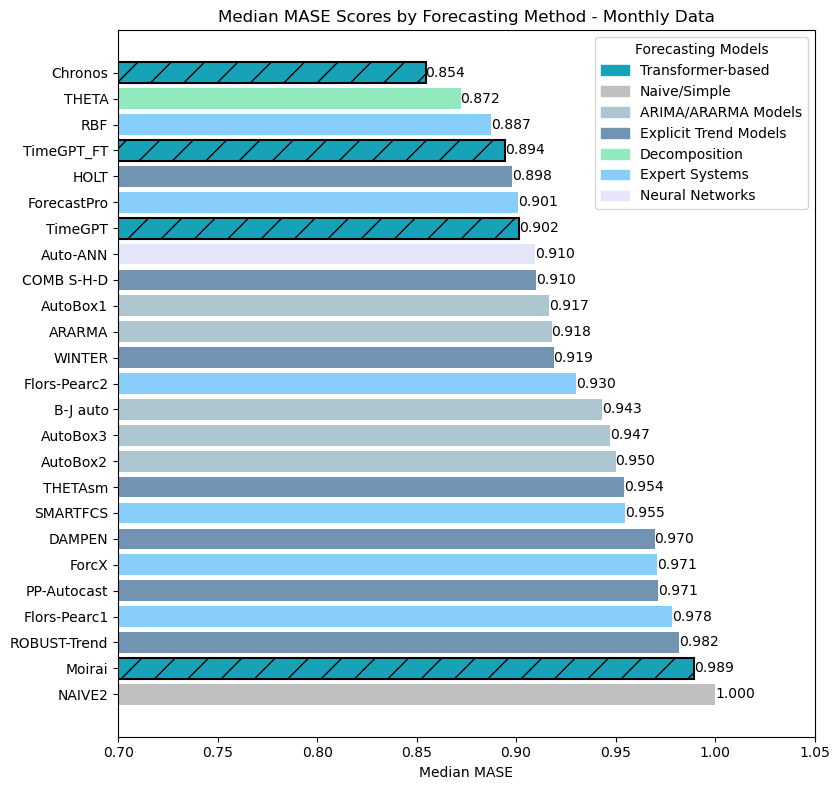

In [21]:
category_colors = median_mase_df['Category'].map(color_map)

plt.figure(figsize=(10, 8))
bars = plt.barh(median_mase_df['Method'], median_mase_df['MedianMASE'], color=category_colors)

transformer_bars = [bar for bar, method in zip(bars, median_mase_df['Method']) if median_mase_df.loc[median_mase_df['Method'] == method, 'Category'].values[0] == 'Transformer-based']
for bar in transformer_bars:
    bar.set_edgecolor('black')  # Adding a black border to the bar
    bar.set_linewidth(1.5)  # Making the border thicker
    bar.set_hatch('/')  # Adding a hatch pattern

for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{bar.get_width():.3f}', va='center', ha='left')

plt.xlabel('Median MASE')
plt.title('Median MASE Scores by Forecasting Method - Monthly Data')
plt.gca().invert_yaxis()  # Invert y-axis to have the best method at the top
plt.legend(
    [plt.Rectangle((0,0),1,1, color=color_map[category]) for category in color_map],
    color_map.keys(),
    title="Forecasting Models",
    loc='best'  
)

plt.xlim(left=0.7)
plt.tight_layout(rect=[0,0,0.85,1])  
plt.show()